### Create new dataset for Mujoco FT.

In [7]:
%cd /share/portal/aw588

/share/portal/aw588


In [8]:
from datasets import load_dataset
from datasets import Dataset, Features, Image, DatasetDict
import datasets

In [4]:
Dataset.cleanup_cache_files

<function datasets.arrow_dataset.Dataset.cleanup_cache_files(self) -> int>

## Prepare dataset

In [9]:
data_path = f"/share/portal/aw588/finetuning/data"

In [10]:
dataset = load_dataset("json",
    data_files={
        "train": f"{data_path}/train_split.json", 
        "val": f"{data_path}/val_split.json",
        "test": f"{data_path}/test_split.json",
        "manual_test": f"{data_path}/manual_test_split.json"
})

Generating train split: 20000 examples [00:00, 55703.91 examples/s]
Generating val split: 8000 examples [00:00, 252158.14 examples/s]
Generating test split: 10938 examples [00:00, 277482.53 examples/s]
Generating manual_test split: 200 examples [00:00, 39656.82 examples/s]


In [13]:
dataset

DatasetDict({
    train: Dataset({
        features: ['anchor', 'pos', 'neg'],
        num_rows: 20000
    })
    val: Dataset({
        features: ['anchor', 'pos', 'neg'],
        num_rows: 8000
    })
    test: Dataset({
        features: ['anchor', 'pos', 'neg'],
        num_rows: 10938
    })
    manual_test: Dataset({
        features: ['anchor', 'pos', 'neg'],
        num_rows: 200
    })
})

In [12]:
# Check the data
dataset["train"][0]

{'anchor': 'finetuning/data/v3_flipping/anchor/5716_pose.png',
 'pos': 'finetuning/data/v3_flipping/pos/5716_0_pose.png',
 'neg': 'finetuning/data/v3_flipping/neg/5716_mirrored.png'}

In [15]:
split_list = [
    "train",
    "val",
    "test",
    "manual_test"
]


In [16]:
for split in split_list:
    anchor_image_paths = [item['anchor'] for item in dataset[split]]
    pos_image_paths = [item['pos'] for item in dataset[split]]
    neg_image_paths = [item['neg'] for item in dataset[split]]
    
    dataset_images = Dataset.from_dict({
        "anchor_image": anchor_image_paths,
        "pos_image": pos_image_paths,
        "neg_image": neg_image_paths
    }, features=Features({
        "anchor_image": Image(),
        "pos_image": Image(),
        "neg_image": Image()
    }))
    
    dataset[split] = datasets.concatenate_datasets([dataset[split], dataset_images], axis=1)

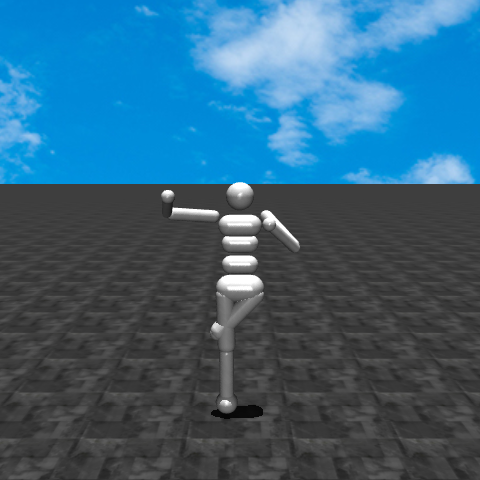

In [20]:
# Check data
dataset["train"][0]['anchor_image']

## Push to hub (full)

In [21]:

# 

In [22]:
from huggingface_hub import login

HF_W_TOKEN = # Fill the HF's token for writing to the hub

login(token=HF_W_TOKEN)

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to /home/aw588/.cache/huggingface/token
Login successful


In [23]:
hf_name = "mujoco_ft_v3"
full_hf = f"anneyouw/{hf_name}"

In [24]:
dataset.push_to_hub(full_hf)

Uploading the dataset shards: 100%|█████████████████████████████████████████████████████████████████████| 1/1 [00:15<00:00, 15.64s/it]


CommitInfo(commit_url='https://huggingface.co/datasets/anneyouw/mujoco_ft_v3/commit/624e47b4899dcb842e98192ffe778bd0f06167b4', commit_message='Upload dataset', commit_description='', oid='624e47b4899dcb842e98192ffe778bd0f06167b4', pr_url=None, pr_revision=None, pr_num=None)

## Now, try the dataset

In [25]:
split_val = datasets.load_dataset(full_hf, split="val")

Generating manual_test split: 100%|█████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 413.30 examples/s]


In [26]:
split_val

Dataset({
    features: ['anchor', 'pos', 'neg', 'anchor_image', 'pos_image', 'neg_image'],
    num_rows: 8000
})